In [ ]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 46.3 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import requests
import time
import os
from joblib import Memory
from shapely.geometry import Point
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Base_Path = "/content/drive/MyDrive/capstone_project_fire_risk"

In [ ]:
import os

print(f"Current working directory: {os.getcwd()}")
os.chdir(Base_Path)
print(f"Current working directory: {os.getcwd()}")

Current working directory: /content
Current working directory: /content/drive/MyDrive/capstone_project_fire_risk


In [ ]:
casernes = gpd.read_file(f"{Base_Path}/casernes/results.shp")

In [ ]:
casernes.describe(include='all')

,CASERNE,NO_CIVIQUE,RUE,LATITUDE,LONGITUDE,ARRONDISSE,VILLE,DATE_DEBUT,DATE_FIN,MTM8_X,MTM8_Y,geometry
count,68,68,68,68,68,54,14,68,68,68.000000,6.800000e+01,68
unique,68,65,66,68,68,19,13,3,2,NaN,NaN,68
top,76,10,rue Hochelaga,45.4863189887702,-73.5984275366453,VILLE-MARIE,DORVAL,2015-01-01T07:00:00,NaT,NaN,NaN,POINT (293728.99899981637 5038905.9956858745)
freq,1,4,2,1,1,6,2,57,67,NaN,NaN,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,293677.504412,5.042299e+06,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8592.474540,6.812751e+03,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269580.000000,5.030970e+06,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,291351.000000,5.037482e+06,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,296033.500000,5.041398e+06,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,299655.000000,5.045532e+06,NaN


In [ ]:
casernes.head()

,CASERNE,NO_CIVIQUE,RUE,LATITUDE,LONGITUDE,ARRONDISSE,VILLE,DATE_DEBUT,DATE_FIN,MTM8_X,MTM8_Y,geometry
0,03,256,rue Young,45.4934543793718,-73.5601720032226,LE SUD-OUEST,None,2015-01-01T07:00:00,NaT,300097.0,5039283.0,POINT (300096.998 5039283.002)
1,15,1255,rue de la Sucrerie,45.4844194758814,-73.5609171345086,LE SUD-OUEST,None,2015-01-01T07:00:00,NaT,300038.0,5038279.0,POINT (300037.998 5038278.995)
2,23,523,place Saint-Henri,45.477820050794,-73.5852566191264,LE SUD-OUEST,None,2015-01-01T07:00:00,NaT,298134.6,5037547.3,POINT (298134.559 5037547.331)
3,33,6040,boulevard Monk,45.4578413687524,-73.5954499348277,LE SUD-OUEST,None,2015-01-01T07:00:00,NaT,297335.0,5035328.0,POINT (297334.999 5035328)
4,09,8100,boulevard Saint-Michel,45.5637484701804,-73.6101688625091,VILLERAY-SAINT-MICHEL-PARC-EXTENSION,None,2019-05-06T07:00:00,NaT,296200.0,5047099.0,POINT (296199.997 5047098.997)


<Axes: >

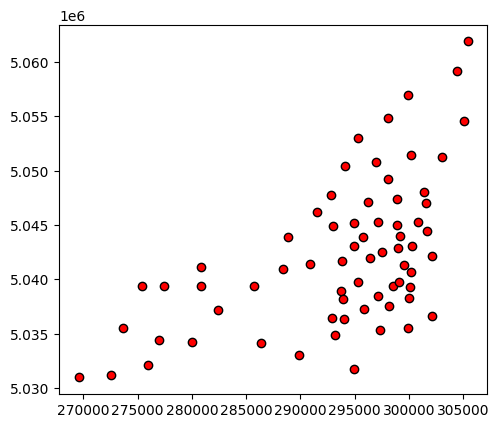

In [ ]:
casernes.plot(color='red', edgecolor='black')

In [ ]:
#casernes['CASERNE'] = pd.to_numeric(casernes['CASERNE'], errors='coerce')

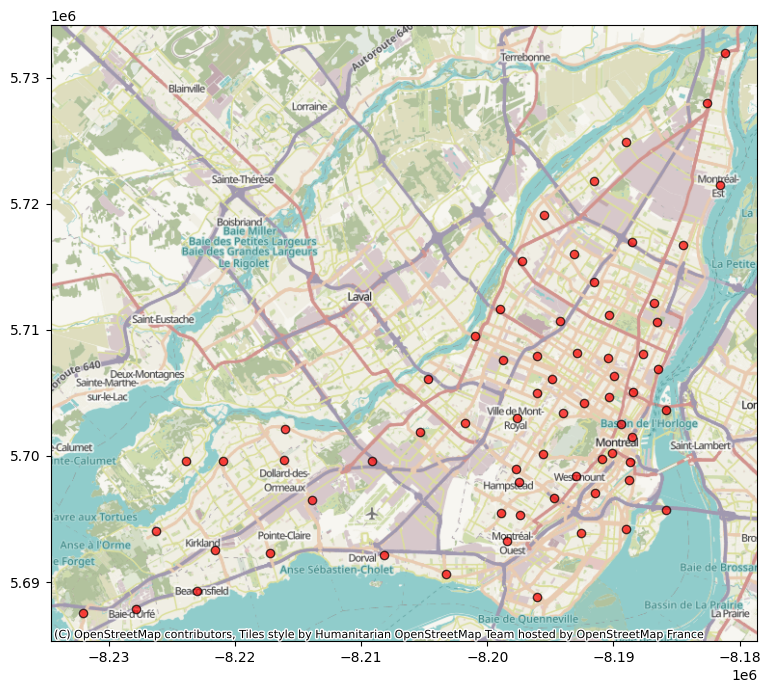

In [ ]:
import contextily as ctx

# Reproject to Web Mercator (EPSG:3857) for basemaps
casernes = casernes.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 8))
casernes.plot(ax=ax, alpha=0.7, color='red', edgecolor='black', legend=True)
ctx.add_basemap(ax)
plt.show()

In [ ]:
casernes.columns

Index(['CASERNE', 'NO_CIVIQUE', 'RUE', 'LATITUDE', 'LONGITUDE', 'ARRONDISSE',
       'VILLE', 'DATE_DEBUT', 'DATE_FIN', 'MTM8_X', 'MTM8_Y', 'geometry'],
      dtype='object')